# Level 1

## Task 1 : Top Cuisines

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
resturant = pd.read_csv("C:/Users/AKASH HN/Downloads/ds internship/Dataset .csv")
import warnings
warnings.filterwarnings('ignore')

In [3]:
resturant.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [4]:
resturant.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
data = resturant.dropna()
data.shape

(9542, 21)

### Top three most common cuisines in the dataset.

In [6]:
print('Top 3 cusines are: ')
top_3 = data['Cuisines'].value_counts().head(3)
top_3

Top 3 cusines are: 


Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64

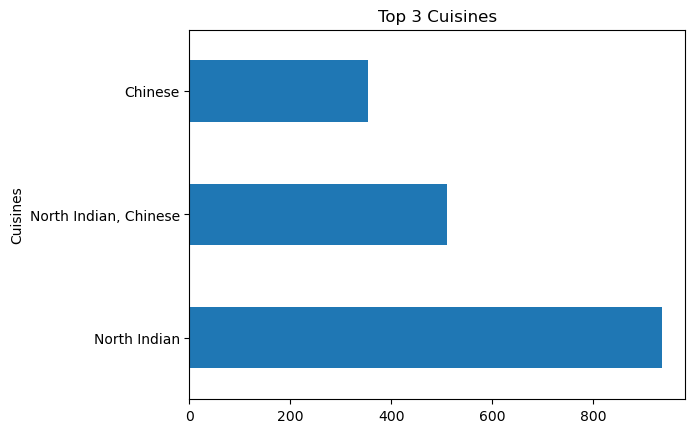

In [7]:
data['Cuisines'].value_counts()[:3].plot(kind = 'barh',rot = 0)
plt.title('Top 3 Cuisines')
plt.show()

### The percentage of restaurants that serve each of the top cuisines.

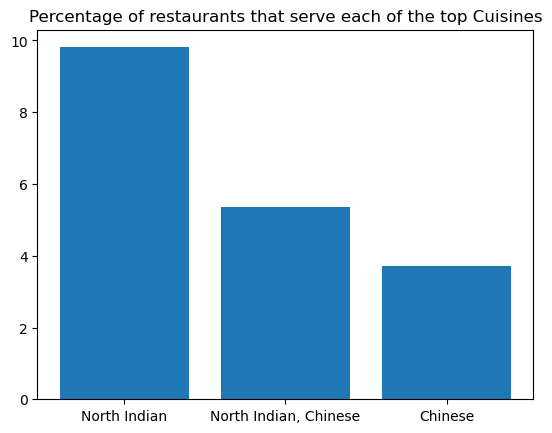

In [8]:
ls_avg = []
for c in top_3.index:
    ls_avg.append(round((top_3[c]/9542)*100,3))
plt.bar(top_3.index,ls_avg)
plt.title('Percentage of restaurants that serve each of the top Cuisines')
plt.show()

In [9]:
print('The percentage of restaurants that serve each of the top Cuisines')
for i in range(len(ls_avg)):
    print(f'{top_3.index[i]} = {round((top_3[i]/9542)*100,3)} %')

The percentage of restaurants that serve each of the top Cuisines
North Indian = 9.809 %
North Indian, Chinese = 5.355 %
Chinese = 3.71 %


## Task 2 : City Analysis

In [10]:
city = data['City'].value_counts()
city[:10]

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Amritsar          21
Bhubaneshwar      21
Lucknow           21
Name: count, dtype: int64

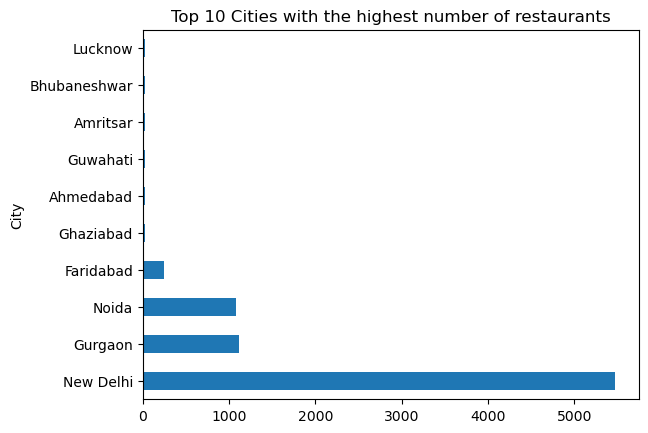

In [11]:
city[:10].plot(kind = 'barh')
plt.title('Top 10 Cities with the highest number of restaurants')
plt.show()

### The city with the highest number of restaurants in the dataset.

In [12]:
print('The city with the highest number of restaurants : ')
print(city.index[0])

The city with the highest number of restaurants : 
New Delhi


### The average rating for restaurants in each city

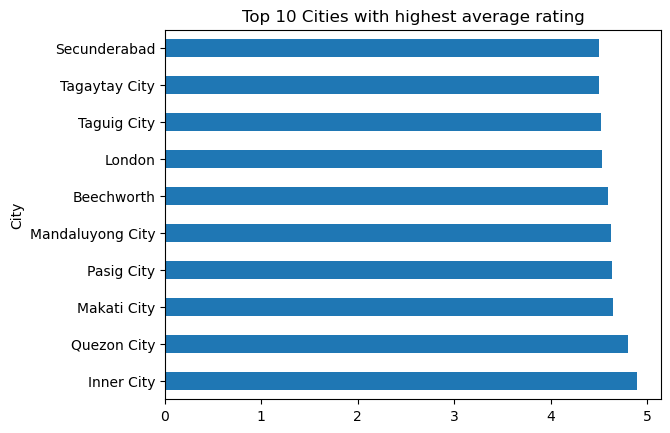

In [13]:
city_grp = data.groupby('City')['Aggregate rating'].mean()
city_grp = city_grp.sort_values(ascending = False)[:10]
city_grp.plot.barh()
plt.title('Top 10 Cities with highest average rating')
plt.show()

### The city with the highest average rating

In [17]:
print('City with the highest average rating: ')
print(city_grp.index[0],'has heighest average Rating of',city_grp[0])

City with the highest average rating: 
Inner City has heighest average Rating of 4.9


## Task 3 : Price Range Distribution

### Bar chart to visualize the distribution of price ranges among the restaurants

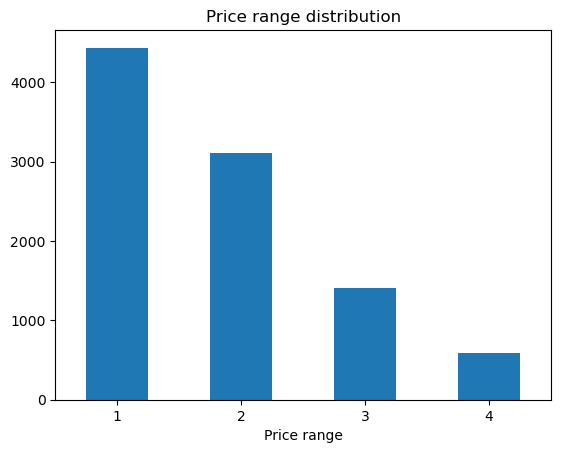

In [18]:
price_range = data['Price range'].value_counts()
price_range.plot(kind = 'bar',rot = 0)
plt.title('Price range distribution')
plt.show()

### The percentage of restaurants in each price range category.


In [19]:
print('The percentage of restaurants in each price range category\n')
for i in price_range.index:
    print(f'For price range {i} Percentage of restaurant is: {round((price_range[i]/price_range.sum())*100,2)} %')

The percentage of restaurants in each price range category

For price range 1 Percentage of restaurant is: 46.51 %
For price range 2 Percentage of restaurant is: 32.62 %
For price range 3 Percentage of restaurant is: 14.72 %
For price range 4 Percentage of restaurant is: 6.14 %


## Task 4: Online Delivery

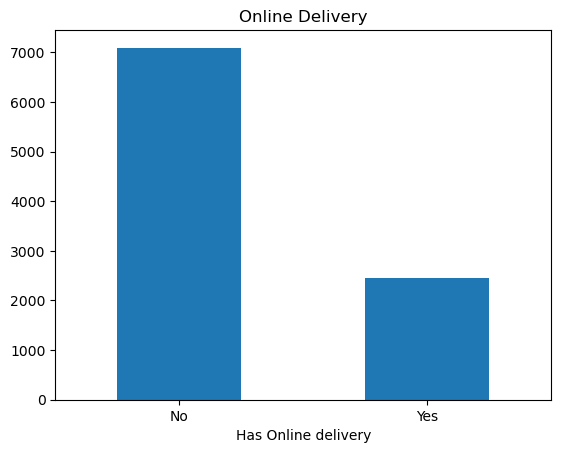

In [20]:
online_delivery = data['Has Online delivery'].value_counts()
online_delivery.plot(kind = 'bar',rot = 0)
plt.xticks(range(2), ['No','Yes'])
plt.title('Online Delivery')
plt.show()

### The percentage of restaurants that offer online delivery.

In [21]:
online_ls = []

for i in online_delivery.index:
    online_ls.append(round((online_delivery[i]/online_delivery.sum())*100,2))

print('The percentage of restaurants that offer online deliveryis : ',online_ls[1],'%')
print('The percentage of restaurants that does not offer online deliveryis : ',online_ls[0],'%')

The percentage of restaurants that offer online deliveryis :  25.69 %
The percentage of restaurants that does not offer online deliveryis :  74.31 %


### The average ratings of restaurants with and without online delivery.


In [22]:
with_online_delivery = data[data['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
print(f'Average rating of restaurants that offer online delivery : {round(with_online_delivery,2)}')
without_online_delivery = data[data['Has Online delivery'] == 'No']['Aggregate rating'].mean()
print(f'Average rating of restaurants that offer online delivery : {round(without_online_delivery,2)}')

Average rating of restaurants that offer online delivery : 3.25
Average rating of restaurants that offer online delivery : 2.46
